# COMBATING OBESITY

Obesity is a major health problem especially in the US and other developed countries. It is also associated with other health problems, among prominent of which are diabetes and hearth diseases.  
With this project, I aim to analyse the CHSI dataset on combating obesity in the US.  
The data set is downloaded from Data.Worl at https://data.world/health/chsi-to-combat-obesity

In [1]:
# import the following packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pycountry

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:,.3f}".format # General format to display only 3 decimal points.

## DEMOGRAPHIC DATA
Import data from an excel file and the tab named "DEMOGRAPHICS" as 'df' and analyze its general information

In [2]:
df = pd.read_excel("./data/CHSI_DataSet.xlsx", sheet_name = 'DEMOGRAPHICS')
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,Min_Population_Size,...,Max_Black,Native_American,Min_Native_American,Max_Native_American,Asian,Min_Asian,Max_Asian,Hispanic,Min_Hispanic,Max_Hispanic
0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,28447,...,17.300,0.500,0.100,1.100,0.600,0.200,2.200,1.700,0.800,19.200
1,4,1,Apache,Arizona,AZ,77,"frontier status, population size",15,69343,26995,...,1.600,76.100,1.000,41.500,0.300,0.300,1.500,4.600,2.800,71.500
2,5,1,Arkansas,Arkansas,AR,75,"frontier status, population size, poverty, age...",37,20073,6228,...,69.600,0.100,0.100,1.600,0.400,0.100,0.500,1.100,0.700,37.800
3,6,1,Alameda,California,CA,1,"frontier status, population size",34,1448905,1214361,...,38.300,0.700,0.200,1.200,24.900,2.200,16.200,20.300,3.100,46.400
4,8,1,Adams,Colorado,CO,4,"frontier status, population size, poverty",25,399426,280446,...,25.900,1.400,0.200,1.500,3.600,0.700,4.600,34.500,1.700,33.300


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State_FIPS_Code             3141 non-null   int64  
 1   County_FIPS_Code            3141 non-null   int64  
 2   CHSI_County_Name            3141 non-null   object 
 3   CHSI_State_Name             3141 non-null   object 
 4   CHSI_State_Abbr             3141 non-null   object 
 5   Strata_ID_Number            3141 non-null   int64  
 6   Strata_Determining_Factors  3141 non-null   object 
 7   Number_Counties             3141 non-null   int64  
 8   Population_Size             3141 non-null   int64  
 9   Min_Population_Size         3141 non-null   int64  
 10  Max_Population_Size         3141 non-null   int64  
 11  Population_Density          3141 non-null   int64  
 12  Min_Population_Density      3141 non-null   int64  
 13  Max_Population_Density      3141 

The dataframe (table) has 44 columns and 3141 rows. There are no NULL values as some initial NULL values have been replaced with negative values such as -1111 or -2222, whose effect is observed in the description below. For more accurate results, these values have been excluded from analyses whenever needed. 

In [4]:
df.describe()

,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number,Number_Counties,Population_Size,Min_Population_Size,Max_Population_Size,Population_Density,Min_Population_Density,Max_Population_Density,...,Max_Black,Native_American,Min_Native_American,Max_Native_American,Asian,Min_Asian,Max_Asian,Hispanic,Min_Hispanic,Max_Hispanic
count,"3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000",...,"3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000","3,141.000"
mean,30.305,103.717,44.696,38.486,"94,368.164","63,206.800","133,875.436",249.119,55.555,584.680,...,22.380,1.974,0.170,5.669,1.123,0.335,2.133,7.018,0.978,18.581
std,15.134,107.999,25.118,10.290,"306,431.656","155,457.331","402,514.532","1,703.042",113.039,"2,345.672",...,19.343,7.675,0.122,12.921,2.757,0.441,2.656,12.465,0.538,17.669
min,1.000,1.000,1.000,15.000,62.000,577.000,"5,228.000","-2,222.000","-2,222.000","-2,222.000",...,0.500,0.000,0.000,0.400,0.000,0.000,0.400,0.000,0.300,2.800
25%,18.000,35.000,23.000,32.000,"11,211.000","6,602.000","21,398.000",17.000,9.000,25.000,...,6.200,0.200,0.100,0.900,0.300,0.100,0.700,1.100,0.700,7.300
50%,29.000,79.000,44.000,37.000,"25,235.000","13,849.000","28,411.000",44.000,25.000,80.000,...,20.000,0.400,0.100,1.600,0.500,0.200,1.100,2.300,0.800,12.100
75%,45.000,133.000,66.000,45.000,"64,040.000","54,746.000","94,198.000",109.000,43.000,238.000,...,33.600,0.900,0.200,3.900,1.000,0.400,2.200,6.300,1.100,21.000
max,56.000,840.000,88.000,62.000,"9,935,475.000","1,214,361.000","3,635,528.000","69,390.000",682.000,"20,520.000",...,71.700,93.400,1.000,82.000,55.900,2.900,16.200,97.500,3.100,83.500


In [5]:
n = df.nunique(axis=0)
print("number of unique values in each column :\n", n)

number of unique values in each column :
 State_FIPS_Code                 51
County_FIPS_Code               324
CHSI_County_Name              1847
CHSI_State_Name                 51
CHSI_State_Abbr                 51
Strata_ID_Number                88
Strata_Determining_Factors       4
Number_Counties                 37
Population_Size               3088
Min_Population_Size             88
Max_Population_Size             88
Population_Density             588
Min_Population_Density          55
Max_Population_Density          71
Poverty                        260
Min_Poverty                     64
Max_Poverty                     66
Age_19_Under                   208
Min_Age_19_Under                56
Max_Age_19_Under                60
Age_19_64                      214
Min_Age_19_64                   60
Max_Age_19_65                   54
Age_65_84                      203
Min_Age_65_84                   54
Max_Age_65_85                   57
Age_85_and_Over                 64
Min_Age_85_an

### Population demographics

Total US population:

In [6]:
df.Population_Size.sum()

296410404

#### State Demographics
Generate and then sort a list states with their total population size

In [7]:
# Generate a list of states with their population size
df_state_pop= df.groupby(['CHSI_State_Abbr'])['Population_Size'].sum()
df_state_pop_reset = df_state_pop.copy().reset_index()
df_state_pop_reset

,CHSI_State_Abbr,Population_Size
0,AK,663661
1,AL,4557808
2,AR,2779154
3,AZ,5939292
4,CA,36132147
5,CO,4665177
6,CT,3510297
7,DC,550521
8,DE,843524
9,FL,17789864


In [8]:
# sort states according to their population size
df_state_pop_reset_sort = df_state_pop_reset.sort_values(by='Population_Size', ascending=False)

Sort the chart of the states according to their population size

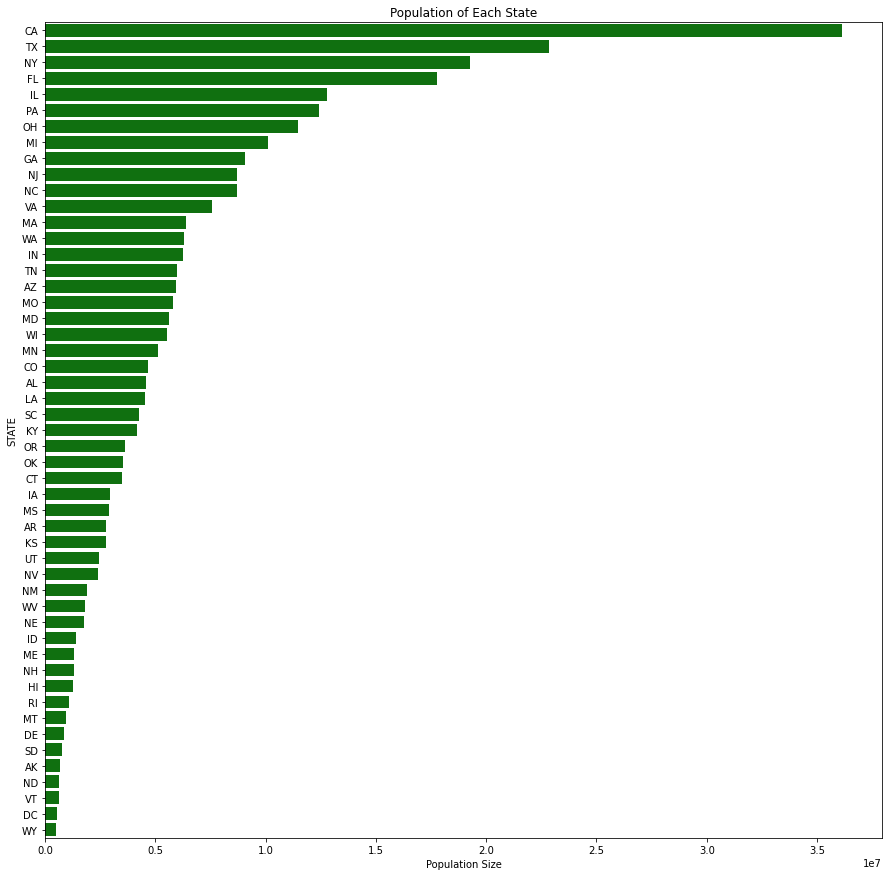

In [9]:
# from seaborn.axisgrid import Grid
# from matplotlib import figure
plt.figure(figsize=(15, 15))
sns.barplot(x=df_state_pop_reset_sort.Population_Size,
            y=df_state_pop_reset_sort.CHSI_State_Abbr,
            color="green")
plt.xlabel("Population Size")
plt.ylabel("STATE")
plt.title("Population of Each State")
plt.savefig("Population.png")
plt.show()

#### County level popuplation demographic
Now, let's look at the population demographics at the county levels. First generate a list of counties with their population, density, and poverty level. 

In [10]:
df_county_pop_dens_pov = df[['CHSI_State_Abbr', 'CHSI_County_Name', 'Population_Size', 'Population_Density', 'Poverty']].sort_values("CHSI_State_Abbr")
df_county_pop_dens_pov

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty
2834,AK,Prince of Wales-Outer Ketchikan,5660,1,13.800
2218,AK,Kenai Peninsula,51960,3,9.900
2918,AK,Southeast Fairbanks,6614,0,15.700
2973,AK,Yukon-Koyukuk,6143,0,17.500
475,AK,Anchorage,275043,162,8.700
...,...,...,...,...,...
288,WY,Crook,6182,2,8.500
605,WY,Natrona,69799,13,12.100
965,WY,Washakie,7933,4,11.100
927,WY,Uinta,19939,10,10.600


In [11]:
df_county_pop_dens_pov = df[['CHSI_State_Abbr', 'CHSI_County_Name', 'Population_Size', 'Population_Density', 'Poverty']].sort_values('Population_Size', ascending=False)
df_county_pop_dens_pov
# sort counties by population size

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty
815,CA,Los Angeles,9935475,2447,17.700
699,IL,Cook,5303683,5608,14.500
2840,TX,Harris,3693050,2136,16.200
292,AZ,Maricopa,3635528,395,12.800
1223,CA,Orange,2988072,3785,10.600
...,...,...,...,...,...
2941,TX,Kenedy,417,0,13.200
123,NE,Arthur,378,1,9.800
2949,TX,King,307,0,14.900
107,HI,Kalawao,111,8,"-2,222.200"


Los Angeles country in CA is the most populous county in the US with 9.9 million people

In [12]:
df_county_pop_dens_pov = df[['CHSI_State_Abbr', 'CHSI_County_Name', 'Population_Size', 'Population_Density', 'Poverty']].sort_values('Population_Density', ascending=False)
df_county_pop_dens_pov
# sort by population density

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty
1277,NY,New York,1593200,69390,18.600
1025,NY,Kings,2486235,35211,23.300
128,NY,Bronx,1357589,32300,26.800
1615,NY,Queens,2241600,20520,15.400
1499,CA,San Francisco,739426,15837,12.000
...,...,...,...,...,...
2905,AK,Skagway-Hoonah-Angoon,3126,0,11.600
1429,AK,Dillingham,4926,0,18.100
2941,TX,Kenedy,417,0,13.200
501,NM,Harding,740,0,13.100


New York county in NY is the most dense county in the US with 69,390 people per square mile. The density for Broomfield county in CO is not available. 

In [13]:
df_county_pop_dens_pov = df[['CHSI_State_Abbr', 'CHSI_County_Name', 'Population_Size', 'Population_Density', 'Poverty']].sort_values('Poverty', ascending=False)
df_county_pop_dens_pov
# sort by population density

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty
3058,TX,Starr,60941,50,36.200
2108,SD,Shannon,13657,7,35.600
785,LA,East Carroll,8756,21,33.900
2213,SD,Todd,9882,7,33.700
2395,SD,Ziebach,2631,1,33.000
...,...,...,...,...,...
455,NJ,Hunterdon,130404,303,3.500
3113,VA,Falls Church City,10781,5418,3.000
650,NM,Los Alamos,18822,172,3.000
776,CO,Douglas,249416,297,2.200


Starr county in TX is the most poverished county with the 36.2% of its population at or below the poverty level.  
The poverty rate for Kalawao county in HI is not available.  
Let's drop Broomfield county (index=337) in CO and Kalawao county (index=107) in HI for having negative numbers, indicative of NULL values.  
Then, we save the file as csv file for interactive visualizaiton in Tableau. 

In [14]:
df_county_pop_dens_pov_clean = df_county_pop_dens_pov[df_county_pop_dens_pov.select_dtypes(include=[np.number]).ge(0).all(1)] # drop negative values
df_county_pop_dens_pov_clean = df_county_pop_dens_pov_clean.sort_values(by='CHSI_State_Abbr', ascending=True) # sort states alphabetically
df_county_pop_dens_pov_clean

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty
2950,AK,Wade Hampton,7541,0,25.100
2668,AK,Matanuska-Susitna,76006,3,10.500
1908,AK,Haines,2272,1,11.400
1429,AK,Dillingham,4926,0,18.100
2782,AK,Northwest Arctic,7621,0,17.000
...,...,...,...,...,...
383,WY,Goshen,12243,6,14.600
336,WY,Fremont,36491,4,12.900
605,WY,Natrona,69799,13,12.100
146,WY,Campbell,37405,8,7.900


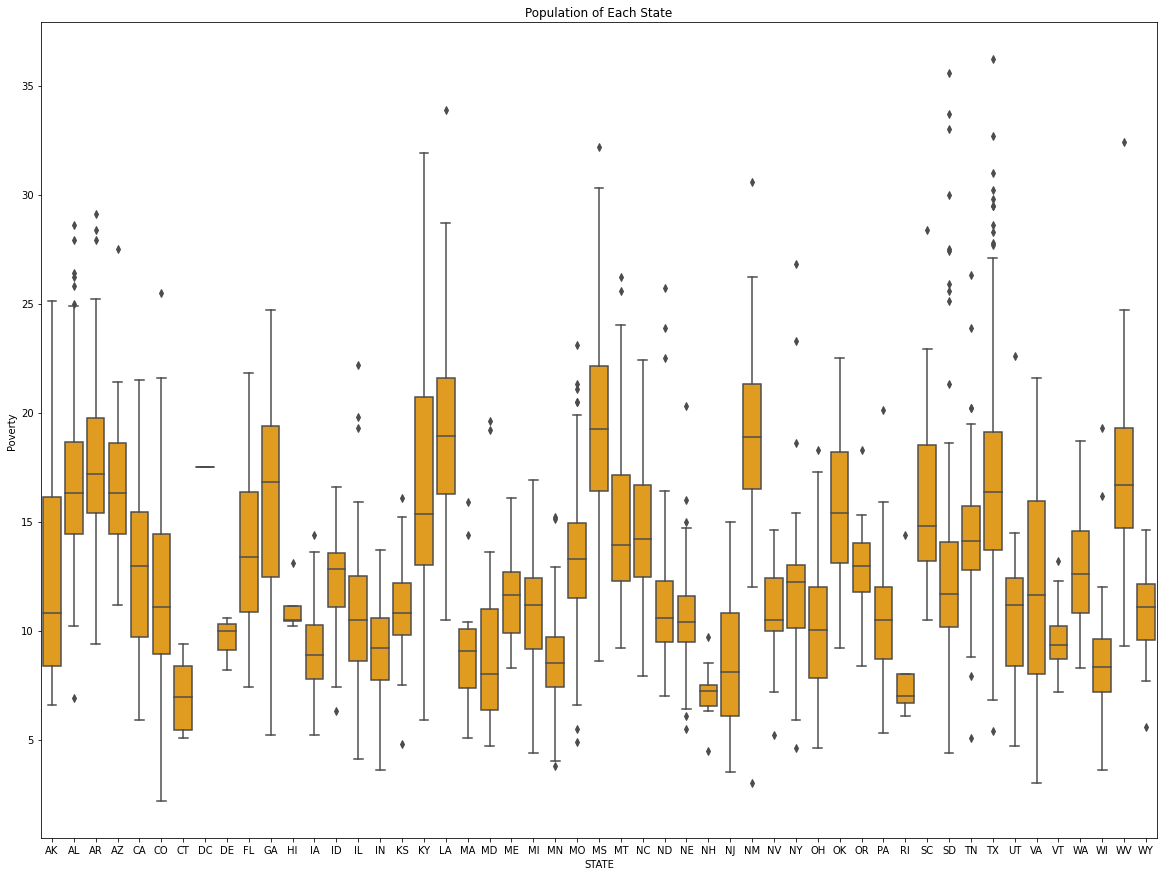

In [15]:
df_county_pop_dens_pov_clean.sort_values("CHSI_State_Abbr", ascending = True, inplace = True)
plt.figure(figsize=(20, 15))
sns.boxplot(x=df_county_pop_dens_pov_clean.CHSI_State_Abbr,
            y=df_county_pop_dens_pov_clean.Poverty,
            color="Orange")
plt.xlabel("STATE")
plt.ylabel("Poverty")
plt.title("Population of Each State")
plt.savefig("Poverty_box.png")
plt.show()

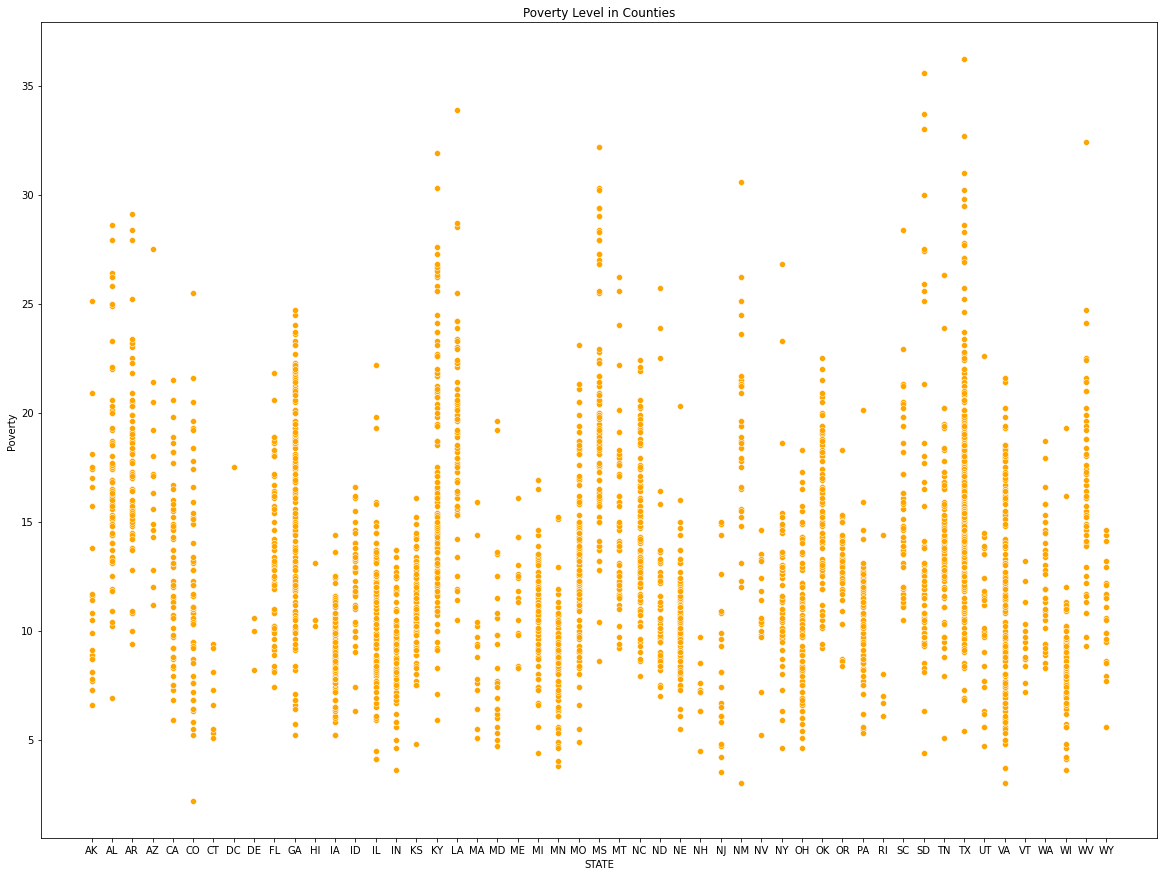

In [16]:
df_county_pop_dens_pov_clean.sort_values("CHSI_State_Abbr", ascending = True, inplace = True)
plt.figure(figsize=(20, 15))
sns.scatterplot(x=df_county_pop_dens_pov_clean.CHSI_State_Abbr,
            y=df_county_pop_dens_pov_clean.Poverty,
            color="Orange")
plt.xlabel("STATE")
plt.ylabel("Poverty")
plt.title("Poverty Level in Counties")
plt.savefig("Poverty_scatterplot.png")
plt.show()

In [17]:
df_county_pop_dens_pov_clean.to_csv('df_county_pop_dens_pov_clean.csv', index=False)

#### Poverty level analysis

In [18]:
df_county_pov = df_county_pop_dens_pov_clean[["CHSI_State_Abbr", "CHSI_County_Name", "Poverty"]].sort_values("Poverty")
df_county_pov

,CHSI_State_Abbr,CHSI_County_Name,Poverty
776,CO,Douglas,2.200
650,NM,Los Alamos,3.000
3113,VA,Falls Church City,3.000
455,NJ,Hunterdon,3.500
1193,IN,Hamilton,3.600
...,...,...,...
2395,SD,Ziebach,33.000
2213,SD,Todd,33.700
785,LA,East Carroll,33.900
2108,SD,Shannon,35.600


Generate average poverty level for each state, sort according to the poverty level, and then generate a bar graph of the data.

In [19]:
df_state_pov_mean = df_county_pov.groupby(['CHSI_State_Abbr'])['Poverty'].mean()
df_state_pov_mean_reset = df_state_pov_mean.copy().reset_index()
df_state_pov_mean_reset

,CHSI_State_Abbr,Poverty
0,AK,12.144
1,AL,17.085
2,AR,17.793
3,AZ,16.840
4,CA,12.869
5,CO,11.797
6,CT,7.062
7,DC,17.500
8,DE,9.600
9,FL,13.812


In [20]:
df_state_pov_mean_reset_sort = df_state_pov_mean_reset.sort_values(by='Poverty', ascending=False)

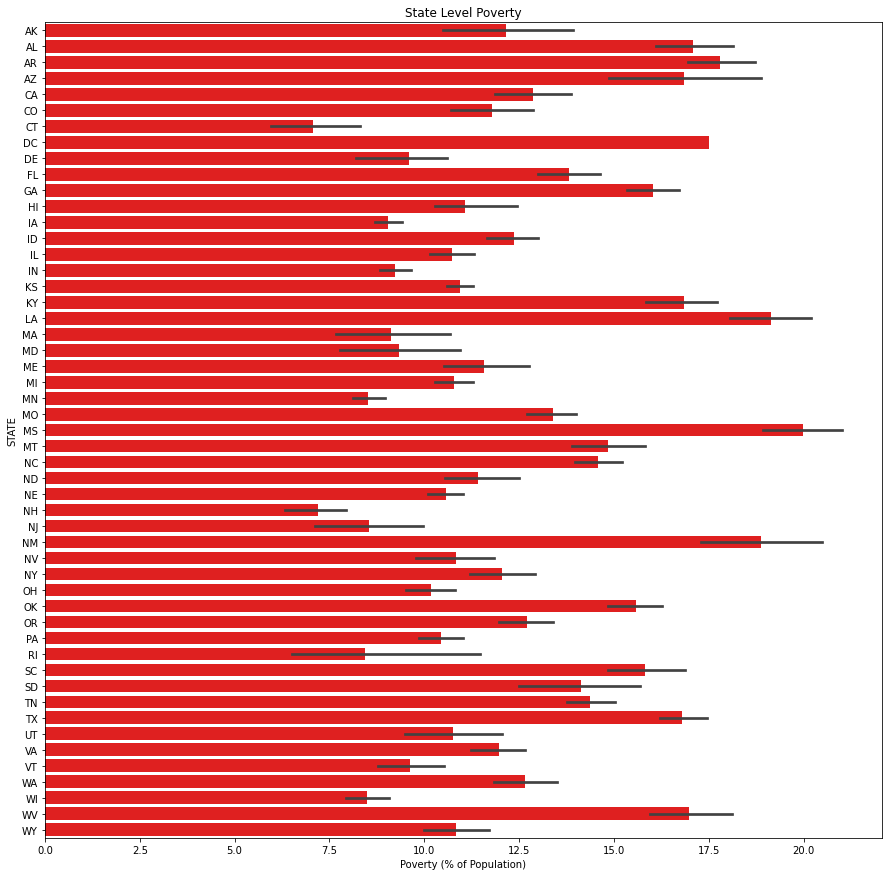

In [21]:
# df_county_pop_dens_pov_clean.sort_values("Poverty", ascending = True, inplace = True)
plt.figure(figsize=(15, 15))
sns.barplot(x=df_county_pop_dens_pov_clean.Poverty,
            y=df_county_pop_dens_pov_clean.CHSI_State_Abbr,
            color="red")
plt.xlabel("Poverty (% of Population)")
plt.ylabel("STATE")
plt.title("State Level Poverty")
plt.savefig("Poverty.png")
plt.show()

### Population age distribution
Let's further look into the population and the percentage of each age group. 

In [22]:
df_county_age = df[["CHSI_State_Abbr", "CHSI_County_Name", "Population_Size", "Age_19_Under", "Age_19_64", "Age_65_84", "Age_85_and_Over"]]
df_county_age

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over
0,AL,Autauga,48612,26.900,62.300,9.800,0.900
1,AZ,Apache,69343,36.800,53.500,8.800,0.900
2,AR,Arkansas,20073,24.900,59.500,13.800,1.800
3,CA,Alameda,1448905,26.200,63.300,9.000,1.500
4,CO,Adams,399426,30.000,62.800,6.500,0.700
...,...,...,...,...,...,...,...
3136,VA,Suffolk City,78994,27.400,62.200,9.100,1.300
3137,VA,Virginia Beach City,438415,27.900,62.500,8.500,1.100
3138,VA,Waynesboro City,21269,25.100,57.200,15.200,2.600
3139,VA,Williamsburg City,11751,24.700,60.600,13.100,1.600


Let's clean this data table by removing any negative values that might be present and then export it as a csv file (Since no rows are deleted, all counties have values for each age group). 

In [23]:
df_county_age_clean = df_county_age[df_county_age.select_dtypes(include=[np.number]).ge(0).all(1)]
df_county_age_clean

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over
0,AL,Autauga,48612,26.900,62.300,9.800,0.900
1,AZ,Apache,69343,36.800,53.500,8.800,0.900
2,AR,Arkansas,20073,24.900,59.500,13.800,1.800
3,CA,Alameda,1448905,26.200,63.300,9.000,1.500
4,CO,Adams,399426,30.000,62.800,6.500,0.700
...,...,...,...,...,...,...,...
3136,VA,Suffolk City,78994,27.400,62.200,9.100,1.300
3137,VA,Virginia Beach City,438415,27.900,62.500,8.500,1.100
3138,VA,Waynesboro City,21269,25.100,57.200,15.200,2.600
3139,VA,Williamsburg City,11751,24.700,60.600,13.100,1.600


In [24]:
df_county_age_clean.to_csv('df_county_age_clean.csv', index=False)

Let's generate a list with the average percent of each age group for each state.

In [25]:
df_state_age_mean = df_county_age.groupby(["CHSI_State_Abbr"]).mean()
df_state_age_mean

,Population_Size,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over
CHSI_State_Abbr,,,,,
AK,"24,580.037",29.448,63.652,6.300,0.593
AL,"68,026.985",25.216,60.655,12.473,1.672
AR,"37,055.387",24.881,59.596,13.487,2.032
AZ,"395,952.800",28.147,56.520,13.707,1.620
CA,"622,968.052",25.959,61.464,10.866,1.731
CO,"72,893.391",24.350,62.930,11.052,1.659
CT,"438,787.125",24.525,62.375,10.762,2.350
DC,"550,521.000",21.500,66.300,10.500,1.800
DE,"281,174.667",24.267,61.267,12.633,1.767


In [26]:
df_state_age_mean_reset = df_state_age_mean.copy().reset_index()
df_state_age_mean_reset.head()

,CHSI_State_Abbr,Population_Size,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over
0,AK,"24,580.037",29.448,63.652,6.300,0.593
1,AL,"68,026.985",25.216,60.655,12.473,1.672
2,AR,"37,055.387",24.881,59.596,13.487,2.032
3,AZ,"395,952.800",28.147,56.520,13.707,1.620
4,CA,"622,968.052",25.959,61.464,10.866,1.731


Let's display population size, density, poverty, and percentage of age groups for each county. Then remove the rows with negative values and save it.

In [27]:
df_county_pop_pov_age = df[["CHSI_State_Abbr", "CHSI_County_Name", "Population_Size", "Population_Density", "Poverty", "Age_19_Under", "Age_19_64", "Age_65_84", "Age_85_and_Over"]]
df_county_pop_pov_age

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over
0,AL,Autauga,48612,82,10.400,26.900,62.300,9.800,0.900
1,AZ,Apache,69343,6,27.500,36.800,53.500,8.800,0.900
2,AR,Arkansas,20073,20,17.300,24.900,59.500,13.800,1.800
3,CA,Alameda,1448905,1964,10.700,26.200,63.300,9.000,1.500
4,CO,Adams,399426,335,10.500,30.000,62.800,6.500,0.700
...,...,...,...,...,...,...,...,...,...
3136,VA,Suffolk City,78994,197,11.400,27.400,62.200,9.100,1.300
3137,VA,Virginia Beach City,438415,1766,8.000,27.900,62.500,8.500,1.100
3138,VA,Waynesboro City,21269,1385,13.100,25.100,57.200,15.200,2.600
3139,VA,Williamsburg City,11751,1376,17.500,24.700,60.600,13.100,1.600


In [28]:
df_county_pop_pov_age_clean = df_county_pop_pov_age[df_county_pop_pov_age.select_dtypes(include=[np.number]).ge(0).all(1)]
df_county_pop_pov_age_clean

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over
0,AL,Autauga,48612,82,10.400,26.900,62.300,9.800,0.900
1,AZ,Apache,69343,6,27.500,36.800,53.500,8.800,0.900
2,AR,Arkansas,20073,20,17.300,24.900,59.500,13.800,1.800
3,CA,Alameda,1448905,1964,10.700,26.200,63.300,9.000,1.500
4,CO,Adams,399426,335,10.500,30.000,62.800,6.500,0.700
...,...,...,...,...,...,...,...,...,...
3136,VA,Suffolk City,78994,197,11.400,27.400,62.200,9.100,1.300
3137,VA,Virginia Beach City,438415,1766,8.000,27.900,62.500,8.500,1.100
3138,VA,Waynesboro City,21269,1385,13.100,25.100,57.200,15.200,2.600
3139,VA,Williamsburg City,11751,1376,17.500,24.700,60.600,13.100,1.600


### Population race distribution
Let's further look into the percentage of each race groups. 

In [29]:
df_county_race = df[["CHSI_State_Abbr", "CHSI_County_Name", "Asian", "Black", "Hispanic", "Native_American", "White"]]
df_county_race

,CHSI_State_Abbr,CHSI_County_Name,Asian,Black,Hispanic,Native_American,White
0,AL,Autauga,0.600,17.300,1.700,0.500,80.700
1,AZ,Apache,0.300,0.600,4.600,76.100,22.200
2,AR,Arkansas,0.400,24.500,1.100,0.100,74.600
3,CA,Alameda,24.900,13.800,20.300,0.700,56.900
4,CO,Adams,3.600,3.200,34.500,1.400,89.800
...,...,...,...,...,...,...,...
3136,VA,Suffolk City,1.300,42.000,1.900,0.300,55.300
3137,VA,Virginia Beach City,5.400,20.000,4.700,0.400,71.500
3138,VA,Waynesboro City,0.800,10.400,4.400,0.400,87.200
3139,VA,Williamsburg City,4.700,12.500,3.000,0.300,81.600


In [30]:
df_county_race_clean = df_county_race[df_county_race.select_dtypes(include=[np.number]).ge(0).all(1)]
df_county_race_clean

,CHSI_State_Abbr,CHSI_County_Name,Asian,Black,Hispanic,Native_American,White
0,AL,Autauga,0.600,17.300,1.700,0.500,80.700
1,AZ,Apache,0.300,0.600,4.600,76.100,22.200
2,AR,Arkansas,0.400,24.500,1.100,0.100,74.600
3,CA,Alameda,24.900,13.800,20.300,0.700,56.900
4,CO,Adams,3.600,3.200,34.500,1.400,89.800
...,...,...,...,...,...,...,...
3136,VA,Suffolk City,1.300,42.000,1.900,0.300,55.300
3137,VA,Virginia Beach City,5.400,20.000,4.700,0.400,71.500
3138,VA,Waynesboro City,0.800,10.400,4.400,0.400,87.200
3139,VA,Williamsburg City,4.700,12.500,3.000,0.300,81.600


In [31]:
df_county_race_clean.to_csv('df_county_race_clean.csv', index=False)

Let's list the average percentage of each race for each state

In [32]:
df_state_race_mean = df_county_race_clean.groupby(["CHSI_State_Abbr"]).mean()
df_state_race_mean

,Asian,Black,Hispanic,Native_American,White
CHSI_State_Abbr,,,,,
AK,4.852,1.174,3.670,36.159,54.485
AL,0.455,28.510,2.104,0.570,69.796
AR,0.556,15.913,3.676,0.585,82.085
AZ,1.140,1.887,27.880,14.813,81.087
CA,6.564,3.626,25.198,2.353,85.086
CO,1.073,1.458,17.455,1.417,95.184
CT,2.688,6.800,7.662,0.362,88.800
DC,3.200,57.000,8.400,0.300,38.000
DE,2.133,19.533,5.367,0.500,76.500


In [33]:
df_state_race_mean_reset = df_state_race_mean.copy().reset_index()
df_state_race_mean_reset.head()

,CHSI_State_Abbr,Asian,Black,Hispanic,Native_American,White
0,AK,4.852,1.174,3.670,36.159,54.485
1,AL,0.455,28.510,2.104,0.570,69.796
2,AR,0.556,15.913,3.676,0.585,82.085
3,AZ,1.140,1.887,27.880,14.813,81.087
4,CA,6.564,3.626,25.198,2.353,85.086


Let's make complete table of population, age groups, and race groups. Then clean and export it. 

In [34]:
df_county_pop_age_race = df[["CHSI_State_Abbr", "CHSI_County_Name", "Population_Size", "Population_Density", "Poverty", "Age_19_Under", "Age_19_64", "Age_65_84", "Age_85_and_Over",
"Asian", "Black", "Hispanic", "Native_American", "White"]]
df_county_pop_age_race

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,Asian,Black,Hispanic,Native_American,White
0,AL,Autauga,48612,82,10.400,26.900,62.300,9.800,0.900,0.600,17.300,1.700,0.500,80.700
1,AZ,Apache,69343,6,27.500,36.800,53.500,8.800,0.900,0.300,0.600,4.600,76.100,22.200
2,AR,Arkansas,20073,20,17.300,24.900,59.500,13.800,1.800,0.400,24.500,1.100,0.100,74.600
3,CA,Alameda,1448905,1964,10.700,26.200,63.300,9.000,1.500,24.900,13.800,20.300,0.700,56.900
4,CO,Adams,399426,335,10.500,30.000,62.800,6.500,0.700,3.600,3.200,34.500,1.400,89.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,VA,Suffolk City,78994,197,11.400,27.400,62.200,9.100,1.300,1.300,42.000,1.900,0.300,55.300
3137,VA,Virginia Beach City,438415,1766,8.000,27.900,62.500,8.500,1.100,5.400,20.000,4.700,0.400,71.500
3138,VA,Waynesboro City,21269,1385,13.100,25.100,57.200,15.200,2.600,0.800,10.400,4.400,0.400,87.200
3139,VA,Williamsburg City,11751,1376,17.500,24.700,60.600,13.100,1.600,4.700,12.500,3.000,0.300,81.600


In [35]:
df_county_pop_age_race_clean = df_county_pop_age_race[df_county_pop_age_race.select_dtypes(include=[np.number]).ge(0).all(1)]
df_county_pop_age_race_clean

,CHSI_State_Abbr,CHSI_County_Name,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,Asian,Black,Hispanic,Native_American,White
0,AL,Autauga,48612,82,10.400,26.900,62.300,9.800,0.900,0.600,17.300,1.700,0.500,80.700
1,AZ,Apache,69343,6,27.500,36.800,53.500,8.800,0.900,0.300,0.600,4.600,76.100,22.200
2,AR,Arkansas,20073,20,17.300,24.900,59.500,13.800,1.800,0.400,24.500,1.100,0.100,74.600
3,CA,Alameda,1448905,1964,10.700,26.200,63.300,9.000,1.500,24.900,13.800,20.300,0.700,56.900
4,CO,Adams,399426,335,10.500,30.000,62.800,6.500,0.700,3.600,3.200,34.500,1.400,89.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,VA,Suffolk City,78994,197,11.400,27.400,62.200,9.100,1.300,1.300,42.000,1.900,0.300,55.300
3137,VA,Virginia Beach City,438415,1766,8.000,27.900,62.500,8.500,1.100,5.400,20.000,4.700,0.400,71.500
3138,VA,Waynesboro City,21269,1385,13.100,25.100,57.200,15.200,2.600,0.800,10.400,4.400,0.400,87.200
3139,VA,Williamsburg City,11751,1376,17.500,24.700,60.600,13.100,1.600,4.700,12.500,3.000,0.300,81.600


As we can see from comparison of these last two codes, only two rows, which we noticed earlier, have been excluded (3141-3139=2)

In [36]:
df_county_pop_age_race_clean.to_csv('df_county_pop_age_race_clean.csv', index=False)

## VULNARIBILITY STATISTICS
Get the data from the tab named "MEASURESOFBIRTHANDDEATH" as 'df_v'

In [37]:
df_v = pd.read_excel("./data/CHSI_DataSet.xlsx", sheet_name = 'VUNERABLEPOPSANDENVHEALTH')
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State_FIPS_Code         3141 non-null   int64 
 1   County_FIPS_Code        3141 non-null   int64 
 2   CHSI_County_Name        3141 non-null   object
 3   CHSI_State_Name         3141 non-null   object
 4   CHSI_State_Abbr         3141 non-null   object
 5   Strata_ID_Number        3141 non-null   int64 
 6   No_HS_Diploma           3141 non-null   int64 
 7   Unemployed              3141 non-null   int64 
 8   Sev_Work_Disabled       3141 non-null   int64 
 9   Major_Depression        3141 non-null   int64 
 10  Recent_Drug_Use         3141 non-null   int64 
 11  Ecol_Rpt                3141 non-null   int64 
 12  Ecol_Rpt_Ind            3141 non-null   int64 
 13  Ecol_Exp                3141 non-null   int64 
 14  Salm_Rpt                3141 non-null   int64 
 15  Salm

Let's make a short list of possible indicators for obesity and poverty. Then clean and save it.

In [38]:
df_v_county = df_v[["CHSI_State_Abbr", "CHSI_County_Name", "No_HS_Diploma", "Unemployed", "Sev_Work_Disabled", "Major_Depression", "Recent_Drug_Use"]]
df_v_county

,CHSI_State_Abbr,CHSI_County_Name,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,Recent_Drug_Use
0,AL,Autauga,6690,774,1727,2680,2394
1,AL,Baldwin,20254,2533,4933,9354,7753
2,AL,Barbour,6729,569,1302,1618,1403
3,AL,Bibb,5355,358,900,1218,1034
4,AL,Blount,11181,819,2217,3164,2675
...,...,...,...,...,...,...,...
3136,WY,Sweetwater,3081,688,817,2649,1782
3137,WY,Teton,762,437,264,1455,789
3138,WY,Uinta,1842,389,408,1347,963
3139,WY,Washakie,780,182,168,576,363


In [39]:
df_v_county_clean = df_v_county[df_v_county.select_dtypes(include=[np.number]).ge(0).all(1)]
df_v_county_clean

,CHSI_State_Abbr,CHSI_County_Name,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,Recent_Drug_Use
0,AL,Autauga,6690,774,1727,2680,2394
1,AL,Baldwin,20254,2533,4933,9354,7753
2,AL,Barbour,6729,569,1302,1618,1403
3,AL,Bibb,5355,358,900,1218,1034
4,AL,Blount,11181,819,2217,3164,2675
...,...,...,...,...,...,...,...
3136,WY,Sweetwater,3081,688,817,2649,1782
3137,WY,Teton,762,437,264,1455,789
3138,WY,Uinta,1842,389,408,1347,963
3139,WY,Washakie,780,182,168,576,363


36 rows have been excluded for having negative values, indication of NULL values. 

In [40]:
df_v_county_clean.to_csv('df_v_county_clean.csv', index=False)

## RISK FACTORS
Get the data from the tab named "RISKFACTORSANDACCESSTOCARE" as 'df_riskf'

In [41]:
df_riskf = pd.read_excel("./data/CHSI_DataSet.xlsx", sheet_name = 'RISKFACTORSANDACCESSTOCARE')
df_riskf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State_FIPS_Code              3141 non-null   int64  
 1   County_FIPS_Code             3141 non-null   int64  
 2   CHSI_County_Name             3141 non-null   object 
 3   CHSI_State_Name              3141 non-null   object 
 4   CHSI_State_Abbr              3141 non-null   object 
 5   Strata_ID_Number             3141 non-null   int64  
 6   No_Exercise                  3141 non-null   float64
 7   CI_Min_No_Exercise           3141 non-null   float64
 8   CI_Max_No_Exercise           3141 non-null   float64
 9   Few_Fruit_Veg                3141 non-null   float64
 10  CI_Min_Fruit_Veg             3141 non-null   float64
 11  CI_Max_Fruit_Veg             3141 non-null   float64
 12  Obesity                      3141 non-null   float64
 13  CI_Min_Obesity    

Let's make a short list of possible indicators for obesity, clean and save it. 

In [42]:
df_riskf_county_summary = df_riskf[["CHSI_State_Abbr", "CHSI_County_Name", "Obesity", "Diabetes", "High_Blood_Pres", "Smoker",  "Few_Fruit_Veg", "No_Exercise", "Uninsured"]]
df_riskf_county_summary.head()

,CHSI_State_Abbr,CHSI_County_Name,Obesity,Diabetes,High_Blood_Pres,Smoker,Few_Fruit_Veg,No_Exercise,Uninsured
0,AL,Autauga,24.500,14.200,29.100,26.600,78.600,27.800,5690
1,AL,Baldwin,23.600,7.200,30.500,24.600,76.200,27.200,19798
2,AL,Barbour,25.600,6.600,"-1,111.100",17.700,"-1,111.100","-1,111.100",5126
3,AL,Bibb,"-1,111.100",13.100,"-1,111.100","-1,111.100",86.600,"-1,111.100",3315
4,AL,Blount,24.200,8.400,"-1,111.100",23.600,74.600,33.500,8131


In [43]:
df_riskf_county_summary_clean = df_riskf_county_summary[df_riskf_county_summary.select_dtypes(include=[np.number]).ge(0).all(1)]
df_riskf_county_summary_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 3140
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHSI_State_Abbr   1433 non-null   object 
 1   CHSI_County_Name  1433 non-null   object 
 2   Obesity           1433 non-null   float64
 3   Diabetes          1433 non-null   float64
 4   High_Blood_Pres   1433 non-null   float64
 5   Smoker            1433 non-null   float64
 6   Few_Fruit_Veg     1433 non-null   float64
 7   No_Exercise       1433 non-null   float64
 8   Uninsured         1433 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 112.0+ KB


In [44]:
df_riskf_county_summary_clean

,CHSI_State_Abbr,CHSI_County_Name,Obesity,Diabetes,High_Blood_Pres,Smoker,Few_Fruit_Veg,No_Exercise,Uninsured
0,AL,Autauga,24.500,14.200,29.100,26.600,78.600,27.800,5690
1,AL,Baldwin,23.600,7.200,30.500,24.600,76.200,27.200,19798
7,AL,Calhoun,27.000,11.200,33.200,25.500,81.900,29.200,16456
10,AL,Chilton,31.200,6.000,26.500,30.000,82.800,30.300,6130
21,AL,Cullman,22.200,10.000,35.000,27.600,76.200,29.400,11912
...,...,...,...,...,...,...,...,...,...
3136,WY,Sweetwater,23.600,5.300,22.700,27.400,80.700,21.900,5477
3137,WY,Teton,9.000,2.400,18.900,13.700,68.800,9.600,1846
3138,WY,Uinta,22.700,4.800,22.500,21.600,83.100,23.400,3007
3139,WY,Washakie,21.100,9.400,27.800,19.700,78.100,23.200,1178


1708 rows have been excluded for having negative values.

In [45]:
df_riskf_county_summary_clean.to_csv('df_riskf_county_summary_clean.csv', index=False)

## Obesity
Let's look at the obesity at the county and state levels.

In [46]:
df_county_obesity = df_riskf[['CHSI_State_Abbr', "CHSI_County_Name", "Obesity"]]
df_county_obesity

,CHSI_State_Abbr,CHSI_County_Name,Obesity
0,AL,Autauga,24.500
1,AL,Baldwin,23.600
2,AL,Barbour,25.600
3,AL,Bibb,"-1,111.100"
4,AL,Blount,24.200
...,...,...,...
3136,WY,Sweetwater,23.600
3137,WY,Teton,9.000
3138,WY,Uinta,22.700
3139,WY,Washakie,21.100


In [47]:
df_county_obesity_clean = df_county_obesity[df_county_obesity.select_dtypes(include=[np.number]).ge(0).all(1)]
df_county_obesity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 3140
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHSI_State_Abbr   2224 non-null   object 
 1   CHSI_County_Name  2224 non-null   object 
 2   Obesity           2224 non-null   float64
dtypes: float64(1), object(2)
memory usage: 69.5+ KB


In [48]:
df_county_obesity_clean

,CHSI_State_Abbr,CHSI_County_Name,Obesity
0,AL,Autauga,24.500
1,AL,Baldwin,23.600
2,AL,Barbour,25.600
4,AL,Blount,24.200
6,AL,Butler,22.000
...,...,...,...
3136,WY,Sweetwater,23.600
3137,WY,Teton,9.000
3138,WY,Uinta,22.700
3139,WY,Washakie,21.100


In [49]:
df_county_obesity_clean.to_csv('df_county_obesity_clean.csv', index=False)

917 rows have been excluded for having negative values

In [50]:
df_county_obesity_clean_sort = df_county_obesity_clean.sort_values(by='Obesity', ascending=False)

A list of average percent obesity for each state is given below. 

In [51]:
df_state_obesity_mean = df_county_obesity_clean.groupby(['CHSI_State_Abbr']).mean()
df_state_obesity_mean_reset = df_state_obesity_mean.copy().reset_index()

In [52]:
df_state_obesity_mean_reset_sort = df_state_obesity_mean_reset.sort_values(by='Obesity', ascending=False)
df_state_obesity_mean_reset_sort

,CHSI_State_Abbr,Obesity
24,MS,28.751
39,SC,28.052
17,LA,27.689
48,WV,27.606
0,AL,26.898
16,KY,26.531
1,AR,25.736
14,IN,25.669
35,OK,25.598
21,MI,25.362


In [53]:
df_state_obesity_mean_reset.to_csv('df_state_obesity_mean_reset.csv', index=False)

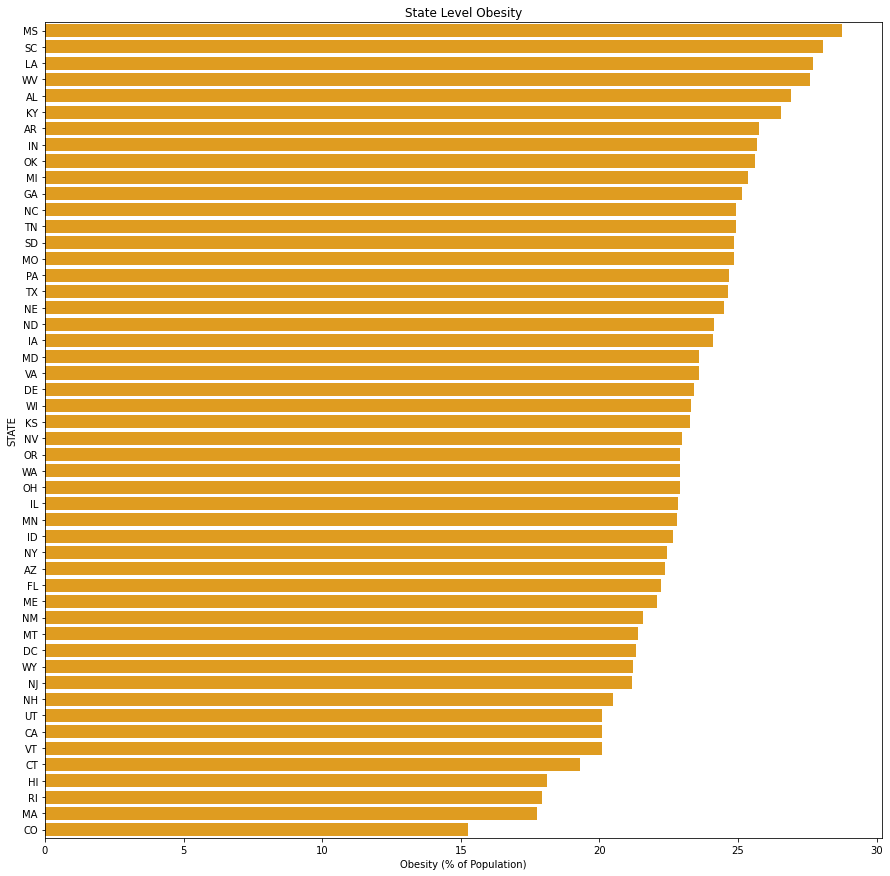

In [54]:
plt.figure(figsize=(15, 15))
sns.barplot(x=df_state_obesity_mean_reset_sort.Obesity,
            y=df_state_obesity_mean_reset_sort.CHSI_State_Abbr,
            color="orange")
plt.xlabel("Obesity (% of Population)")
plt.ylabel("STATE")
plt.title("State Level Obesity")
plt.savefig("Obesity.png")
plt.show()

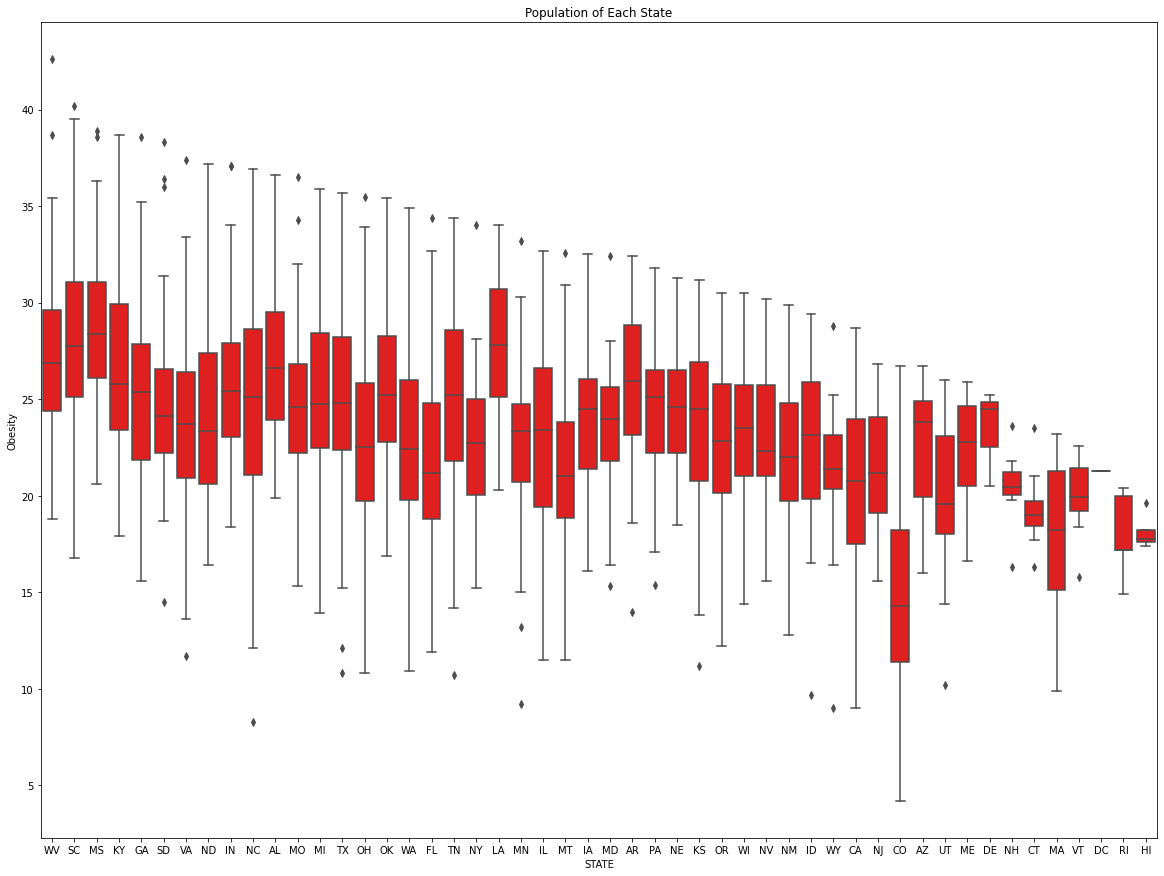

In [55]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=df_county_obesity_clean_sort.CHSI_State_Abbr,
            y=df_county_obesity_clean_sort.Obesity,
            color="Red")
plt.xlabel("STATE")
plt.ylabel("Obesity")
plt.title("Population of Each State")
plt.savefig("Obesity_box.png")
plt.show()

### Leading Cause of Death
from "LeadingCausesOfDeath" table as 'df_death'

In [56]:
df_death = pd.read_excel("./data/CHSI_DataSet.xlsx", sheet_name = 'LEADINGCAUSESOFDEATH')

In [57]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Columns: 235 entries, State_FIPS_Code to LCD_Time_Span
dtypes: int64(231), object(4)
memory usage: 5.6+ MB


Let's make a short list of possible causes of death especially in age groups above 45 years of age.  
Legend:  
    - E: inidcates ages 45-64,  
    - F: indicates ages 65+)  
    - Wh: White,  
    - Bl: Black,  
    - Hi: Hispanic. 

In [58]:
df_death45up_summary = df_death[["CHSI_State_Abbr", "CHSI_County_Name", "E_Wh_Cancer", "E_Bl_Cancer", "E_Hi_Cancer", "E_Wh_HeartDis", "E_Bl_HeartDis", "E_Hi_HeartDis", "F_Wh_Cancer", "F_Bl_Cancer", "F_Hi_Cancer", "F_Wh_HeartDis", "F_Bl_HeartDis", "F_Hi_HeartDis",]]
df_death45up_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHSI_State_Abbr   3141 non-null   object
 1   CHSI_County_Name  3141 non-null   object
 2   E_Wh_Cancer       3141 non-null   int64 
 3   E_Bl_Cancer       3141 non-null   int64 
 4   E_Hi_Cancer       3141 non-null   int64 
 5   E_Wh_HeartDis     3141 non-null   int64 
 6   E_Bl_HeartDis     3141 non-null   int64 
 7   E_Hi_HeartDis     3141 non-null   int64 
 8   F_Wh_Cancer       3141 non-null   int64 
 9   F_Bl_Cancer       3141 non-null   int64 
 10  F_Hi_Cancer       3141 non-null   int64 
 11  F_Wh_HeartDis     3141 non-null   int64 
 12  F_Bl_HeartDis     3141 non-null   int64 
 13  F_Hi_HeartDis     3141 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 343.7+ KB


In [59]:
df_death45up_summary_clean = df_death45up_summary[df_death45up_summary.select_dtypes(include=[np.number]).ge(0).all(1)]
df_death45up_summary_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 69 to 3086
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHSI_State_Abbr   216 non-null    object
 1   CHSI_County_Name  216 non-null    object
 2   E_Wh_Cancer       216 non-null    int64 
 3   E_Bl_Cancer       216 non-null    int64 
 4   E_Hi_Cancer       216 non-null    int64 
 5   E_Wh_HeartDis     216 non-null    int64 
 6   E_Bl_HeartDis     216 non-null    int64 
 7   E_Hi_HeartDis     216 non-null    int64 
 8   F_Wh_Cancer       216 non-null    int64 
 9   F_Bl_Cancer       216 non-null    int64 
 10  F_Hi_Cancer       216 non-null    int64 
 11  F_Wh_HeartDis     216 non-null    int64 
 12  F_Bl_HeartDis     216 non-null    int64 
 13  F_Hi_HeartDis     216 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 25.3+ KB


In [60]:
df_death45up_summary_clean

,CHSI_State_Abbr,CHSI_County_Name,E_Wh_Cancer,E_Bl_Cancer,E_Hi_Cancer,E_Wh_HeartDis,E_Bl_HeartDis,E_Hi_HeartDis,F_Wh_Cancer,F_Bl_Cancer,F_Hi_Cancer,F_Wh_HeartDis,F_Bl_HeartDis,F_Hi_HeartDis
69,AK,Anchorage,31,32,38,21,18,12,27,27,20,23,25,20
101,AZ,Maricopa,33,28,25,21,25,19,21,23,21,30,31,29
104,AZ,Pima,31,23,25,21,25,21,22,22,22,29,30,28
105,AZ,Pinal,30,16,26,24,32,20,24,20,22,29,36,26
184,CA,Alameda,35,28,28,19,23,14,22,23,22,31,31,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,VA,Virginia Beach City,36,34,24,23,23,36,24,22,33,30,27,31
2968,WA,King,37,28,28,20,23,24,23,25,24,27,30,24
2978,WA,Pierce,35,25,25,22,28,22,22,29,24,29,28,25
2982,WA,Snohomish,37,28,45,20,23,11,22,24,24,28,24,25


2925 rows have been deleted. Due to large number of columns, the the number of deleted rows is high. Alternatively, a separate dataframe can be generated for each indicator separately for more accurate results for each indicator. 

In [61]:
df_death45up_summary_clean.to_csv('df_death45up_summary_clean.csv', index=False)

An analysis similar to the above for younger (<45 years of age, B-C groups) did not bring any entry as many rows had negative (NULL) values.

## Vulnarability Statistics
Get the data from the tab named "MEASURESOFBIRTHANDDEATH" as 'df_v'

In [62]:
df_v = pd.read_excel("./data/CHSI_DataSet.xlsx", sheet_name = 'VUNERABLEPOPSANDENVHEALTH')
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State_FIPS_Code         3141 non-null   int64 
 1   County_FIPS_Code        3141 non-null   int64 
 2   CHSI_County_Name        3141 non-null   object
 3   CHSI_State_Name         3141 non-null   object
 4   CHSI_State_Abbr         3141 non-null   object
 5   Strata_ID_Number        3141 non-null   int64 
 6   No_HS_Diploma           3141 non-null   int64 
 7   Unemployed              3141 non-null   int64 
 8   Sev_Work_Disabled       3141 non-null   int64 
 9   Major_Depression        3141 non-null   int64 
 10  Recent_Drug_Use         3141 non-null   int64 
 11  Ecol_Rpt                3141 non-null   int64 
 12  Ecol_Rpt_Ind            3141 non-null   int64 
 13  Ecol_Exp                3141 non-null   int64 
 14  Salm_Rpt                3141 non-null   int64 
 15  Salm

Let's make a short list of possible indicators for obesity and poverty. Then clean and save it.

In [63]:
df_v_county = df_v[["CHSI_State_Abbr", "CHSI_County_Name", "No_HS_Diploma", "Unemployed", "Sev_Work_Disabled", "Major_Depression", "Recent_Drug_Use"]]

In [64]:
df_v_county_clean = df_v_county[df_v_county.select_dtypes(include=[np.number]).ge(0).all(1)]
df_v_county_clean

,CHSI_State_Abbr,CHSI_County_Name,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,Recent_Drug_Use
0,AL,Autauga,6690,774,1727,2680,2394
1,AL,Baldwin,20254,2533,4933,9354,7753
2,AL,Barbour,6729,569,1302,1618,1403
3,AL,Bibb,5355,358,900,1218,1034
4,AL,Blount,11181,819,2217,3164,2675
...,...,...,...,...,...,...,...
3136,WY,Sweetwater,3081,688,817,2649,1782
3137,WY,Teton,762,437,264,1455,789
3138,WY,Uinta,1842,389,408,1347,963
3139,WY,Washakie,780,182,168,576,363


36 rows have been excluded

In [65]:
df_v_county_clean.to_csv('df_v_county_clean.csv', index=False)

## Analysis of Correlation coefficient values
Below is an analysis of correlation coefficient for some indicators related to obesity. It should be noted that correlation does not necessarily mean causation, an important to keep in mind when interpreting correlation data. 

In [66]:
corr_dens_pov = df_county_pop_dens_pov_clean.corr()
corr_dens_pov.style.background_gradient(cmap='coolwarm')

,Population_Size,Population_Density,Poverty
Population_Size,1.000000,0.335218,-0.055490
Population_Density,0.335218,1.000000,0.016220
Poverty,-0.055490,0.016220,1.000000


It is not surprising to have some correlation of population size with population density. We can note that poverty does not seem to have a significant correlation with either population size or population density.

In [67]:
df_state_pov_obes_merge = pd.merge(df_state_pov_mean_reset, df_state_obesity_mean_reset, on="CHSI_State_Abbr")

In [68]:
corr_ob_pov = df_state_pov_obes_merge.corr()
corr_ob_pov.style.background_gradient(cmap='coolwarm')

,Poverty,Obesity
Poverty,1.000000,0.535594
Obesity,0.535594,1.000000


Obesity has a good correlation with poverty with a correlation coefficient of 0.53.

In [69]:
corr_ob_pov.to_csv('df_state_pov_obes_merge_corr.csv')

In [70]:
corr_riskf = df_riskf_county_summary_clean.corr()
corr_riskf.style.background_gradient(cmap='coolwarm')

,Obesity,Diabetes,High_Blood_Pres,Smoker,Few_Fruit_Veg,No_Exercise,Uninsured
Obesity,1.000000,0.570963,0.503596,0.468440,0.409208,0.602247,-0.109239
Diabetes,0.570963,1.000000,0.601845,0.465443,0.187900,0.578070,-0.045715
High_Blood_Pres,0.503596,0.601845,1.000000,0.420469,0.192618,0.563377,-0.093610
Smoker,0.468440,0.465443,0.420469,1.000000,0.303692,0.550984,-0.146482
Few_Fruit_Veg,0.409208,0.187900,0.192618,0.303692,1.000000,0.394751,-0.145864
No_Exercise,0.602247,0.578070,0.563377,0.550984,0.394751,1.000000,-0.025676
Uninsured,-0.109239,-0.045715,-0.093610,-0.146482,-0.145864,-0.025676,1.000000


Theere is a good correlation between obesity and diabetes, high blood pressure, smoking, consuming little fruit-vegetables, and not exercising. It is important to note that eating few fruit and vegetable does not seem to have high correlation with either diabetes or high blood pressure. Not exercising seem to have a good correlation with all diseases. Not having insurance does not have any noticeable correlation with any disease condition. 

In [71]:
corr_riskf.to_csv('df_riskf_county_summary_clean_corr.csv')

In [72]:
corr_45up = df_death45up_summary_clean.corr()
corr_45up.style.background_gradient(cmap='coolwarm')

,E_Wh_Cancer,E_Bl_Cancer,E_Hi_Cancer,E_Wh_HeartDis,E_Bl_HeartDis,E_Hi_HeartDis,F_Wh_Cancer,F_Bl_Cancer,F_Hi_Cancer,F_Wh_HeartDis,F_Bl_HeartDis,F_Hi_HeartDis
E_Wh_Cancer,1.000000,0.313825,0.386581,-0.247865,-0.236203,-0.092863,0.359050,0.123480,0.149577,0.029670,-0.124058,0.008862
E_Bl_Cancer,0.313825,1.000000,0.065030,-0.111803,-0.329335,-0.009175,0.015426,0.082896,-0.032781,0.053529,-0.005352,0.021300
E_Hi_Cancer,0.386581,0.065030,1.000000,-0.139577,-0.054252,-0.182873,0.158921,0.119926,0.114144,0.012546,-0.009928,0.033004
E_Wh_HeartDis,-0.247865,-0.111803,-0.139577,1.000000,0.448561,0.406282,-0.270448,-0.189007,-0.140409,0.468898,0.385836,0.358060
E_Bl_HeartDis,-0.236203,-0.329335,-0.054252,0.448561,1.000000,0.209480,-0.148638,-0.002469,0.006774,0.154039,0.225700,0.163074
E_Hi_HeartDis,-0.092863,-0.009175,-0.182873,0.406282,0.209480,1.000000,-0.059784,-0.100185,0.015009,0.212195,0.188680,0.238335
F_Wh_Cancer,0.359050,0.015426,0.158921,-0.270448,-0.148638,-0.059784,1.000000,0.206805,0.244762,-0.190097,-0.225548,-0.160465
F_Bl_Cancer,0.123480,0.082896,0.119926,-0.189007,-0.002469,-0.100185,0.206805,1.000000,0.115130,-0.141737,-0.347066,-0.183594
F_Hi_Cancer,0.149577,-0.032781,0.114144,-0.140409,0.006774,0.015009,0.244762,0.115130,1.000000,-0.093875,-0.146751,-0.314542
F_Wh_HeartDis,0.029670,0.053529,0.012546,0.468898,0.154039,0.212195,-0.190097,-0.141737,-0.093875,1.000000,0.676571,0.711598


Death due to heart diseases among white, black, and Hispanic populations have high correlation especiall in elderly populations. It is surprising to notice that there seems to be a weak inverse correlation between deaths due to cancer and health diseases, again in elderly patient groups.  

In [73]:
corr_45up.to_csv('df_death45up_summary_clean_corr.csv')

In [74]:
corr_obes_vuln = df_v_county_clean.corr()
corr_obes_vuln.style.background_gradient(cmap='coolwarm')

,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,Recent_Drug_Use
No_HS_Diploma,1.000000,0.957322,0.491954,0.942941,0.957830
Unemployed,0.957322,1.000000,0.407627,0.981033,0.971854
Sev_Work_Disabled,0.491954,0.407627,1.000000,0.434377,0.425820
Major_Depression,0.942941,0.981033,0.434377,1.000000,0.979913
Recent_Drug_Use,0.957830,0.971854,0.425820,0.979913,1.000000


It is not surprising to notice that no high school diploma is greatly associated with unemployment, depression, and drug use. 